# **Insurance Dataset - Retrieved from Kaggle**

**Dataset Overview**

- **This is a health insurance dataset** that contains demographic and medical information of individuals, used to analyze and predict individual medical costs billed by health insurance.
- **Number of Records:** 1,338
- **Number of Features:** 7
- **Source:** Mirichoi0218. (2018). Insurance Dataset [Kaggle Dataset]. [Link to Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

**Feature Description**

| Feature       | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| **age**       | Age of the policyholder (individual).                                       |
| **sex**       | Gender of the individual (`male` or `female`).                              |
| **bmi**       | Body Mass Index — a measure of body fat based on height and weight.         |
| **children**  | Number of dependent children covered by the insurance.                      |
| **smoker**    | Smoking status of the individual (`yes` or `no`).                           |
| **region**    | Residential region in the US (`northeast`, `northwest`, `southeast`, `southwest`). |
| **charges**   | **Medical costs billed by health insurance** for the individual.            |


# **Import Required Library**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, poisson, binom, chi2_contingency, ttest_ind, f_oneway, shapiro, kstest, probplot, chisquare, expon, kstest, anderson

# **Load the Dataset**

In [49]:
data = pd.read_csv('health_insurance.csv')

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Exploratory Data Analysis - EDA**

## **Data Overview**

*   **Number Of Records And Features**


In [50]:
raw_df = data.copy()

num_records = raw_df.shape[0]
num_features = raw_df.shape[1]

print("Number of records:", num_records)
print("Number of features:", num_features)

Number of records: 1338
Number of features: 7


*   **Column Heading**


In [51]:
print(raw_df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


*   **Data Type of Each Variable**


In [52]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*   **Check for Missing Values**


In [53]:
raw_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


*   **Check for Duplicated Rows**


In [54]:
duplicated_rows = raw_df.duplicated().sum()

print("Number of Duplicated Rows =", duplicated_rows)

Number of Duplicated Rows = 1


In [55]:
duplicate_entries_all = raw_df[raw_df.duplicated(keep=False)]
print(duplicate_entries_all)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631




*   **Drop Duplicated Rows**




In [56]:
raw_df = raw_df.drop_duplicates(keep='first')

raw_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## **Descriptive Statistical Analysis**

*   **Check for Unique Values of Each Column**


In [57]:
raw_df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


*   **Summary Statistics**

In [58]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801




*   **Proportion of Smokers vs Non-Smokers**



In [59]:
smoker_counts = raw_df['smoker'].value_counts().reset_index()
smoker_counts.columns = ['smoker', 'count']

fig = px.pie(smoker_counts, names='smoker', values='count',
             title='Proportion of Smokers vs Non-Smokers',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()



*   **Medical Charrges Based on Smoking Status**



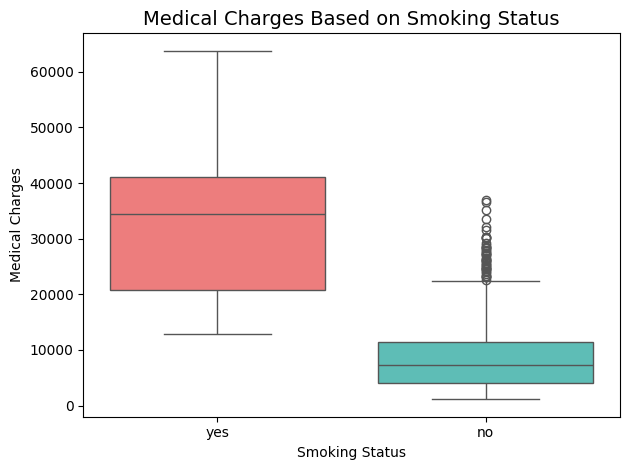

In [60]:
sns.boxplot(data=raw_df, x='smoker', y='charges', palette={'yes': '#FF6B6B', 'no': '#4ECDC4'}, hue="smoker")

plt.title("Medical Charges Based on Smoking Status", fontsize=14)

plt.xlabel("Smoking Status")
plt.ylabel("Medical Charges")

plt.tight_layout()
plt.show()



*   **Distribution of Smokers by Sex**



In [61]:
fig = px.histogram(raw_df, x="smoker", color="sex", barmode="group",
                   title="Distribution of Smokers by Sex",
                   labels={"smoker": "Smoking Status", "count": "Count"},
                   color_discrete_map={'male': '#1f77b4', 'female': '#ff69b4'})

fig.show()



*   **Distribution of Policyholders by Region**



In [62]:
region_counts = raw_df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

fig = px.bar(region_counts, x='region', y='count',
             title='Distribution of Policyholders by Region',
             color='region', color_discrete_sequence=px.colors.qualitative.Set2,
             text='count')

fig.show()



*   **Average Medical Charges by Region in the U.S.**




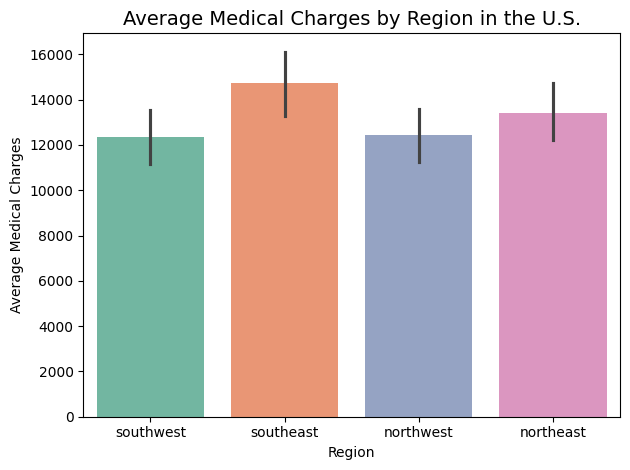

In [63]:
sns.barplot(data=raw_df, x='region', y='charges', palette='Set2', hue="region")

plt.title("Average Medical Charges by Region in the U.S.", fontsize=14)

plt.xlabel("Region")
plt.ylabel("Average Medical Charges")

plt.tight_layout()
plt.show()



*   **BMI Distribution by Region**



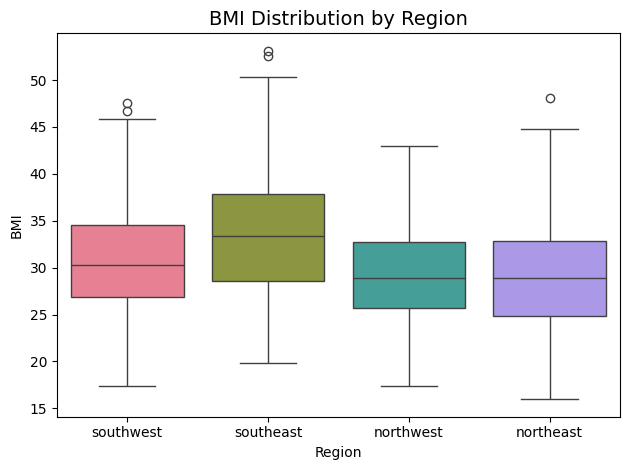

In [64]:
sns.boxplot(data=raw_df, x='region', y='bmi', palette='husl', hue="region")

plt.title("BMI Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("BMI")

plt.tight_layout()

plt.show()



*   **Distribution of Smokers by Region**



In [65]:
fig = px.histogram(raw_df, x="region", color="smoker", barmode="group",
                   title="Distribution of Smokers by Region",
                   labels={"region": "Region", "count": "Count"},
                   color_discrete_map={'yes': '#66c2a5', 'no': '#ff7f0e'})
fig.show()



*   **Average Medical Charges by Number of Dependent Children**



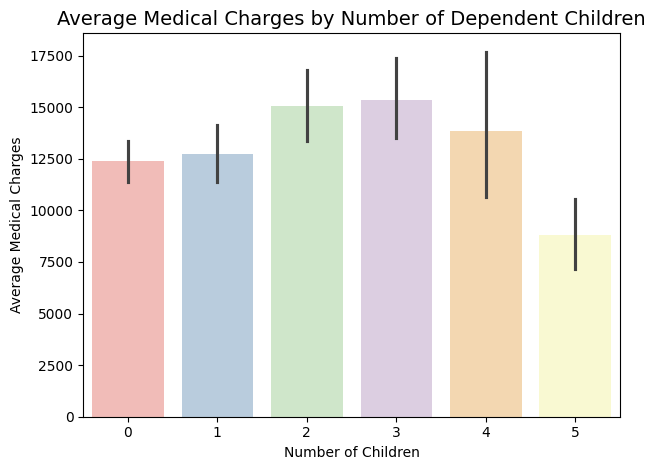

In [66]:
sns.barplot(data=raw_df, x='children', y='charges', palette='Pastel1', hue="children")

plt.title("Average Medical Charges by Number of Dependent Children", fontsize=14)

plt.xlabel("Number of Children")
plt.ylabel("Average Medical Charges")

plt.legend().remove()

plt.tight_layout()
plt.show()



*   **Cost Incurred by Age for Female and Male**



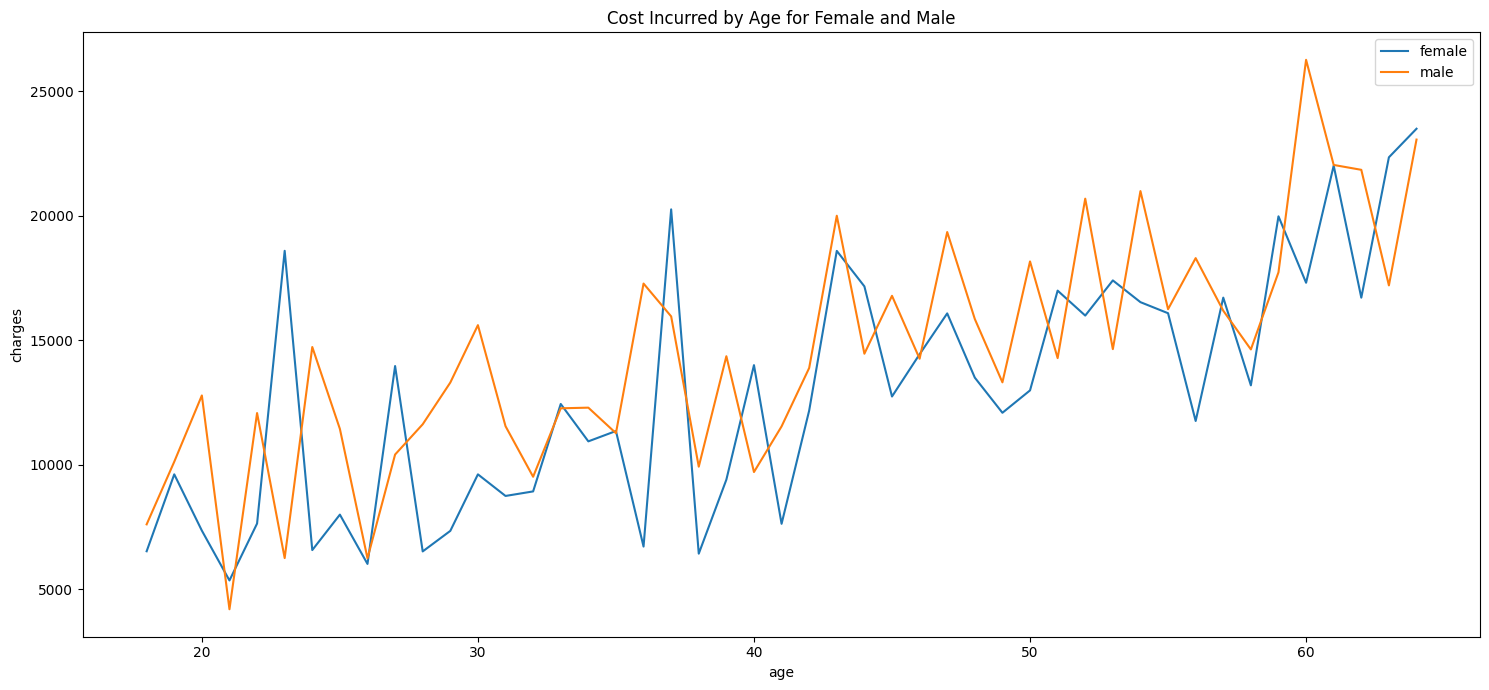

In [67]:
plt.figure(figsize=(15, 7))

sns.lineplot(x=raw_df["age"], y=raw_df["charges"], hue=raw_df["sex"], errorbar=None)

plt.title('Cost Incurred by Age for Female and Male')

plt.legend(bbox_to_anchor=(1.00, 1))

plt.tight_layout()
plt.show()



*   **Average Charges by Age Group**



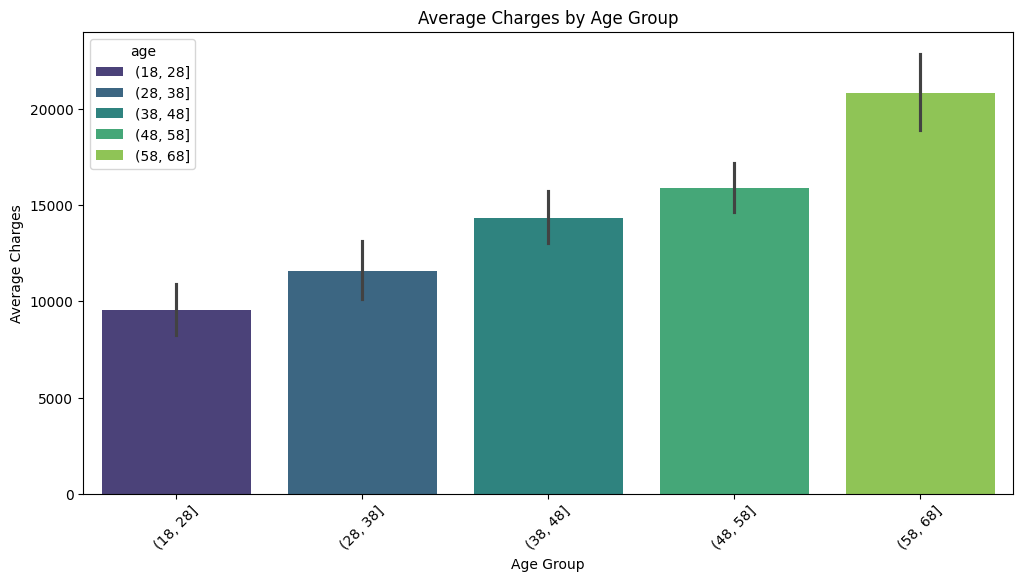

In [68]:
age_bins = [18, 28, 38, 48, 58, 68]

plt.figure(figsize=(12, 6))
sns.barplot(data=raw_df, x=pd.cut(raw_df["age"], bins=age_bins), y="charges", palette="viridis", hue=pd.cut(raw_df["age"], bins=age_bins))
plt.title('Average Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()

## **Outlier Detection**

*   **Using IQR Method**


In [69]:
cols = [
    'age',
    'bmi',
    'children',
    'charges',
]

for col in cols:
    Q1 = raw_df[col].quantile(0.25)
    Q3 = raw_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col} Feature: ", end="")
    print("Q1 =", Q1, end="; ")
    print("Q3 =", Q3, end="; ")
    print("IQR =", IQR, end="; ")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

    outliers = raw_df[(raw_df[col] < lower_bound) | (raw_df[col] > upper_bound)]
    print(f"Number of Outliers in {col}: {outliers.shape[0]}")

    if outliers.shape[0] > 0:
        raw_df = raw_df.drop(outliers.index)
        print(f"Outliers removed from {col}")
    else:
        print(f"No outliers found in {col}")

    print("--------------------------------------------------------------------------------------")

age Feature: Q1 = 27.0; Q3 = 51.0; IQR = 24.0; Lower Bound = -9.0, Upper Bound = 87.0
Number of Outliers in age: 0
No outliers found in age
--------------------------------------------------------------------------------------
bmi Feature: Q1 = 26.29; Q3 = 34.7; IQR = 8.410000000000004; Lower Bound = 13.674999999999994, Upper Bound = 47.31500000000001
Number of Outliers in bmi: 9
Outliers removed from bmi
--------------------------------------------------------------------------------------
children Feature: Q1 = 0.0; Q3 = 2.0; IQR = 2.0; Lower Bound = -3.0, Upper Bound = 5.0
Number of Outliers in children: 0
No outliers found in children
--------------------------------------------------------------------------------------
charges Feature: Q1 = 4744.32505; Q3 = 16604.302645; IQR = 11859.977595; Lower Bound = -13045.6413425, Upper Bound = 34394.269037499995
Number of Outliers in charges: 138
Outliers removed from charges
-----------------------------------------------------------------



*   **Box Plot After Removing Outliers**




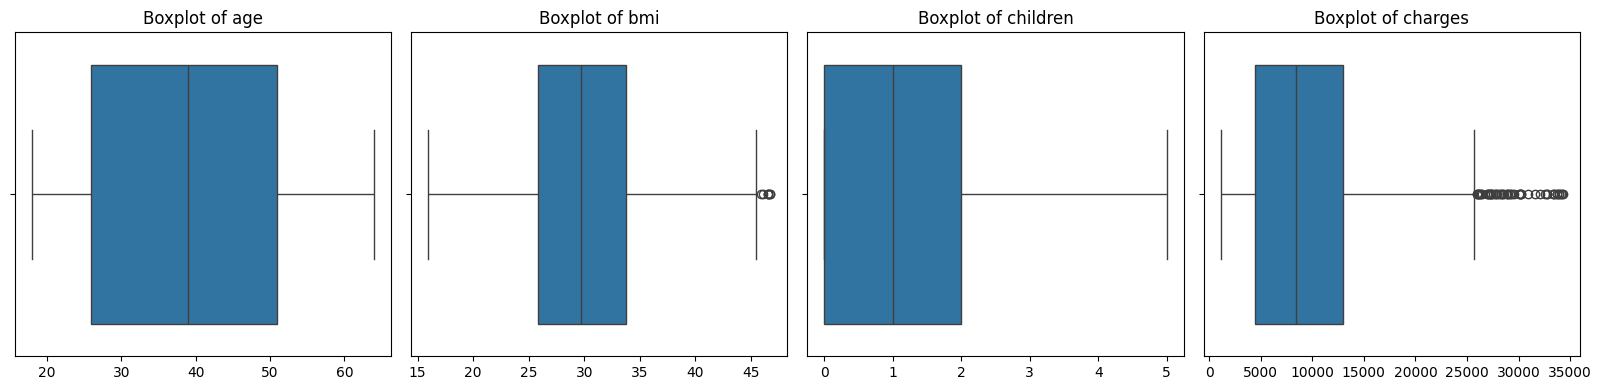

In [70]:
rows = 1
cols_per_row = 4

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4))

axes = axes.flatten()

for i, col in enumerate(cols):
    if i < len(cols):
        sns.boxplot(data=raw_df, x=col, ax=axes[i])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_xlabel('')

plt.tight_layout()
plt.show()



*   **Statistical Summary After Removing Outliers**



In [71]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,39.027731,14.050554,18.0000,26.000000,39.000000,51.0000,64.0000
bmi,1190.0,29.993147,5.873027,15.9600,25.800000,29.700000,33.7700,46.7500
children,1190.0,1.088235,1.216558,0.0000,0.000000,1.000000,2.0000,5.0000
charges,1190.0,9908.046614,7186.405555,1121.8739,4418.591062,8378.605575,12955.3563,34303.1672


## **Dataset Insight Summary**

* **Insurance costs increase with age**.
* **Smokers, particularly males**, file more claims and incur higher medical bills.
* **Non-smoking females** also have more claims than non-smoking males, possibly due to factors like childbirth.
* **Beneficiaries with 2 or 3 dependents** generally have higher medical costs than those with 5. This may be due to the uneven distribution of data across groups (e.g., 574 observations for "no dependents" vs. 18 for "five dependents").
* Individuals with a **BMI over 30** face higher health risks and more claims.
* **Females with a BMI above 45** have higher insurance expenses.
* **Age**, **BMI**, and **smoking habits** are key factors driving up insurance costs.


# **Probability Distribution**

*   **Comparing Column Distribution to Normal Distribution**
> By overlaying a normal curve (with the same mean and standard deviation), we can visually assess the mismatch between the actual data and the idealized normal assumption.
>  `bmi` and `charges` are a continuous variables, so we will examine whether these variables follow a normal distribution.

In [72]:
def norm_visualize(df, col_name):
    data = pd.to_numeric(df[col_name], errors='coerce').dropna()
    mu, std = data.mean(), data.std()
    plt.figure(figsize=(8, 4))
    sns.histplot(data, bins=30, kde=True, stat='density', alpha=0.4, color='skyblue', label='Histogram + KDE')
    x = np.linspace(data.min(), data.max(), 100)
    plt.plot(x, norm.pdf(x, mu, std), 'r--', linewidth=2, label=f'N(μ={mu:.2f}, σ={std:.2f})')
    plt.title(f"Distribution of {col_name} vs Normal")
    plt.xlabel(col_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

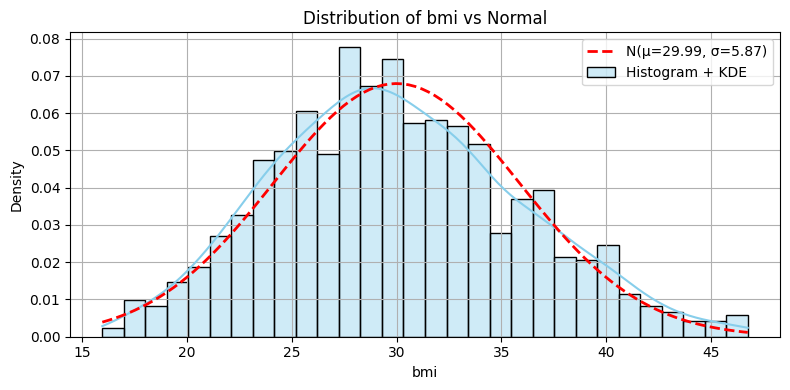

In [73]:
norm_visualize(raw_df, 'bmi')

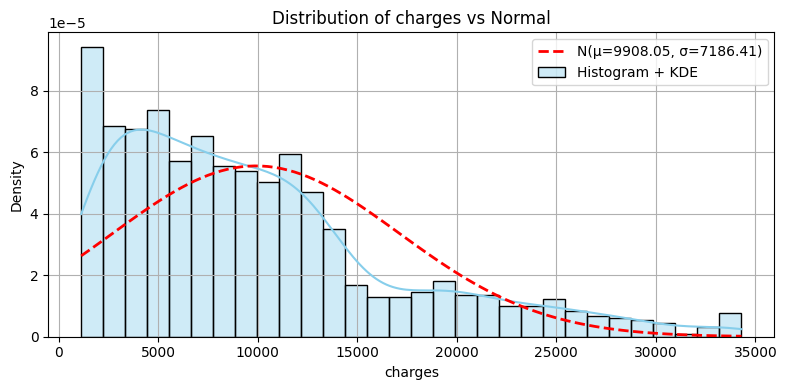

In [74]:
norm_visualize(raw_df, 'charges')

> The distribution of `bmi` closely *resembles* a normal distribution, with the histogram and KDE aligning well with the theoretical normal curve (μ=29.99, σ=5.87). In contrast, the distribution of `charges` is heavily* right-skewed*, deviating significantly from normality (μ=9908.05, σ=7186.41), indicating that a transformation (e.g., log) may be needed for normality assumptions in statistical tests.

In [75]:
def norm_qq(df, col):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    plt.figure(figsize=(6, 5))
    probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot: {col} vs Normal")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

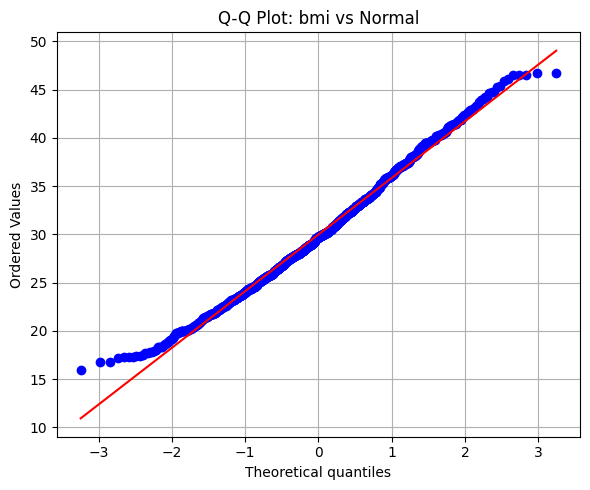

In [76]:
norm_qq(raw_df, 'bmi')

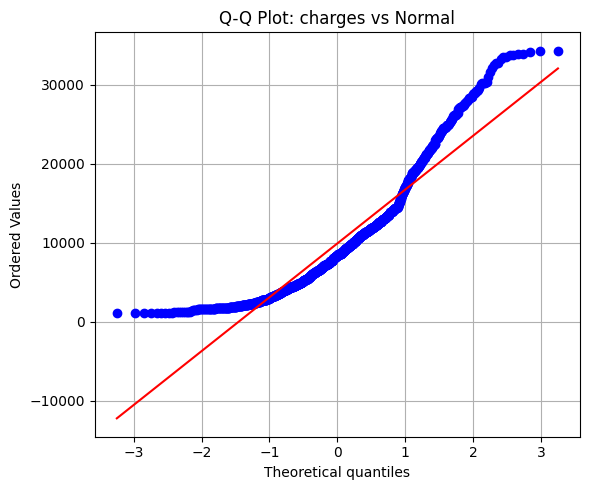

In [77]:
norm_qq(raw_df, 'charges')

In [78]:
def shapiro_wilk(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  stat, p = stats.shapiro(data)
  print("KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'")
  print("- Giá trị thống kê:", stat)
  print("- P-value:", p)
  print("- Mức ý nghĩa (alpha):", alpha)
  print("\nKẾT LUẬN:")
  if p > alpha:
      print("Dữ liệu có phân phối chuẩn")
  else:
      print("Dữ liệu KHÔNG có phân phối chuẩn")

In [79]:
shapiro_wilk(raw_df, 'bmi')

KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'
- Giá trị thống kê: 0.9924512753274175
- P-value: 9.064403125418294e-06
- Mức ý nghĩa (alpha): 0.05

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn


In [80]:
shapiro_wilk(raw_df, 'charges')

KẾT QUẢ KIỂM ĐỊNH 'Shapiro-Wilk'
- Giá trị thống kê: 0.8963949146504633
- P-value: 1.4045781548922721e-27
- Mức ý nghĩa (alpha): 0.05

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn


In [81]:
def kolmogorov_smirnov(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  mu, sigma = np.mean(data), np.std(data)
  stat, p = stats.kstest(data, 'norm', args=(mu, sigma))
  print("KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'")
  print("- Giá trị thống kê:", stat)
  print("- P-value:", p)
  print("- Mức ý nghĩa (alpha):", alpha)
  print(f"- Tham số ước lượng: μ={mu:.4f}, σ={sigma:.4f}")
  print("\nKẾT LUẬN:")
  if p > alpha:
      print("Dữ liệu có phân phối chuẩn")
  else:
      print("Dữ liệu KHÔNG có phân phối chuẩn")

In [82]:
kolmogorov_smirnov(raw_df, 'bmi')

KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'
- Giá trị thống kê: 0.03400629136896305
- P-value: 0.12464795971814824
- Mức ý nghĩa (alpha): 0.05
- Tham số ước lượng: μ=29.9931, σ=5.8706

KẾT LUẬN:
Dữ liệu có phân phối chuẩn


In [83]:
kolmogorov_smirnov(raw_df, 'charges')

KẾT QUẢ KIỂM ĐỊNH 'Kolmogorov–Smirnov'
- Giá trị thống kê: 0.11064139042732873
- P-value: 3.832825005536548e-13
- Mức ý nghĩa (alpha): 0.05
- Tham số ước lượng: μ=9908.0466, σ=7183.3854

KẾT LUẬN:
Dữ liệu KHÔNG có phân phối chuẩn


> According to the Shapiro-Wilk test, the 'bmi' variable does not follow a normal distribution. However, the Kolmogorov–Smirnov test indicates that 'bmi' appears to follow a normal distribution (p-value > 0.05).
>
> For the 'charges' variable, both tests show that the data does not follow a normal distribution.

*   **Poission Distribution Testing**

In [84]:
def poisson_visualize(df, col_name):
    data = pd.to_numeric(df[col_name], errors='coerce').dropna()
    mu = data.mean()
    values, counts = np.unique(data, return_counts=True)
    probs = counts / counts.sum()
    plt.figure(figsize=(8, 4))
    plt.bar(values, probs, alpha=0.7, color='skyblue', label='Observed')
    plt.plot(values, poisson.pmf(values, mu), 'ro-', label=f'Poisson (μ={mu:.2f})')
    plt.title(f"Distribution of {col_name} vs Poisson")
    plt.xlabel(col_name)
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

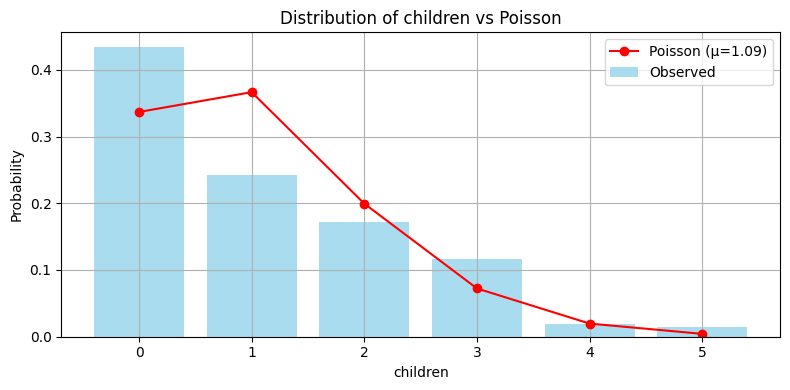

In [85]:
poisson_visualize(raw_df, 'children')

> The distribution of children roughly aligns with a Poisson distribution, as the observed frequencies (blue bars) follow the general shape of the Poisson probability mass function (red line). However, there are slight deviations, particularly at higher values (e.g., 4 and 5 children), suggesting potential overdispersion or the need for a goodness-of-fit test to confirm the Poisson fit.



*   **Poission Chi Squared Testing**



In [86]:
def poisson_chi_square(df, col, alpha=0.05):
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    mu = data.mean()
    values, counts = np.unique(data, return_counts=True)
    expected = poisson.pmf(values, mu) * len(data)
    while np.any(expected < 5) and len(expected) > 3:
        values = np.append(values[:-2], values[-2])
        counts = np.append(counts[:-2], counts[-2] + counts[-1])
        expected = np.append(expected[:-2], expected[-2] + expected[-1])
    if len(counts) != len(expected):
        raise ValueError("Chiều dài counts và expected không khớp sau khi gộp")
    expected = expected * (counts.sum() / expected.sum())

    stat, p = chisquare(counts, expected)
    print("- Chi-Square:")
    print(f"  Statistic = {stat:.4f}, p-value = {p:.4f}")
    print(f"  Kết luận: {'Dữ liệu có phân phối Poisson' if p > alpha else 'Dữ liệu KHÔNG có phân phối Poisson'}")

In [87]:
poisson_chi_square(raw_df, 'children')

- Chi-Square:
  Statistic = 151.5722, p-value = 0.0000
  Kết luận: Dữ liệu KHÔNG có phân phối Poisson


*   **Poission Dispersion Testing**

In [88]:
def poisson_dispersion(df, col, alpha=0.05):
  data = pd.to_numeric(df[col], errors='coerce').dropna()
  mu = data.mean()
  variance = data.var()
  dispersion = (variance / mu) - 1
  print("- Dispersion:")
  print(f"  Statistic = {dispersion:.4f}")
  print(f"  Kết luận: {'Dữ liệu có phân phối Poisson' if abs(dispersion) < alpha else 'Dữ liệu KHÔNG có phân phối Poisson'}")

In [89]:
poisson_dispersion(raw_df, 'children')

- Dispersion:
  Statistic = 0.3600
  Kết luận: Dữ liệu KHÔNG có phân phối Poisson


> Although the histogram roughly matches a Poisson distribution, both the Chi-squared test and dispersion index indicate that the data does not follow a Poisson distribution.
> Visual inspection can be `misleading` when the data range is limited or discrete, making statistical tests more reliable for distribution assessment.

# **Hypothesis Testing**

*   **t-test Method**

>  T-test is suitable for continuous variables and for comparing between two groups.

> "Is there a difference in insurance charges between smokers and non-smokers?"

T-test statistic = 25.5981, p-value = 0.0000
→ Có sự khác biệt có ý nghĩa thống kê về chi phí giữa 2 nhóm hút thuốc và không hút thuốc.


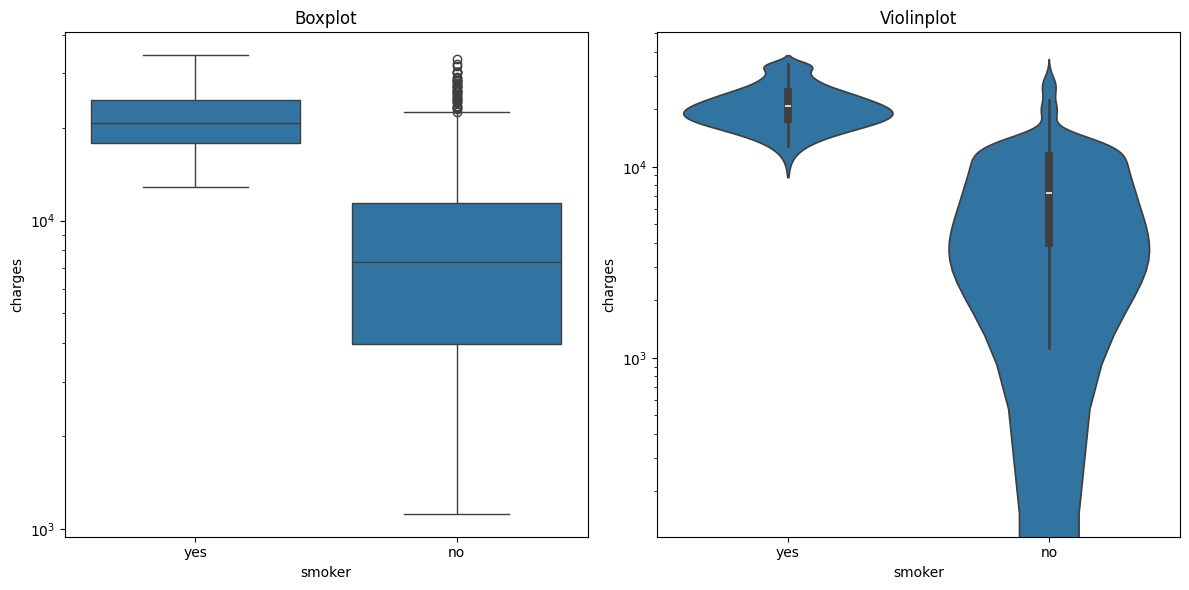

In [90]:
group1 = raw_df[raw_df['smoker'] == 'yes']['charges']
group2 = raw_df[raw_df['smoker'] == 'no']['charges']
stat, p = ttest_ind(group1, group2)
print(f"T-test statistic = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Có sự khác biệt có ý nghĩa thống kê về chi phí giữa 2 nhóm hút thuốc và không hút thuốc.")
else:
    print("→ KHÔNG có sự khác biệt có ý nghĩa thống kê.")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='smoker', y='charges', data=raw_df)
plt.yscale('log')
plt.title("Boxplot")
plt.subplot(1, 2, 2)
sns.violinplot(x='smoker', y='charges', data=raw_df)
plt.yscale('log')
plt.title("Violinplot")
plt.tight_layout()
plt.show()

> There is a statistically significant difference in medical charges between smokers and non-smokers.
>
>Visualization insights:
>
>Boxplot and violin plot both show that smokers tend to have much higher medical charges than non-smokers.
>
>The distribution for smokers is more concentrated at higher values, while non-smokers show a wider range and more variability in costs.
>
>The difference is clearly visible, supporting the T-test result.

* **ANOVA**

>"Is there a difference in insurance charges across different regions?"

ANOVA statistic = 3.8453, p-value = 0.0094
→ Có sự khác biệt có ý nghĩa thống kê về chi phí giữa các vùng.


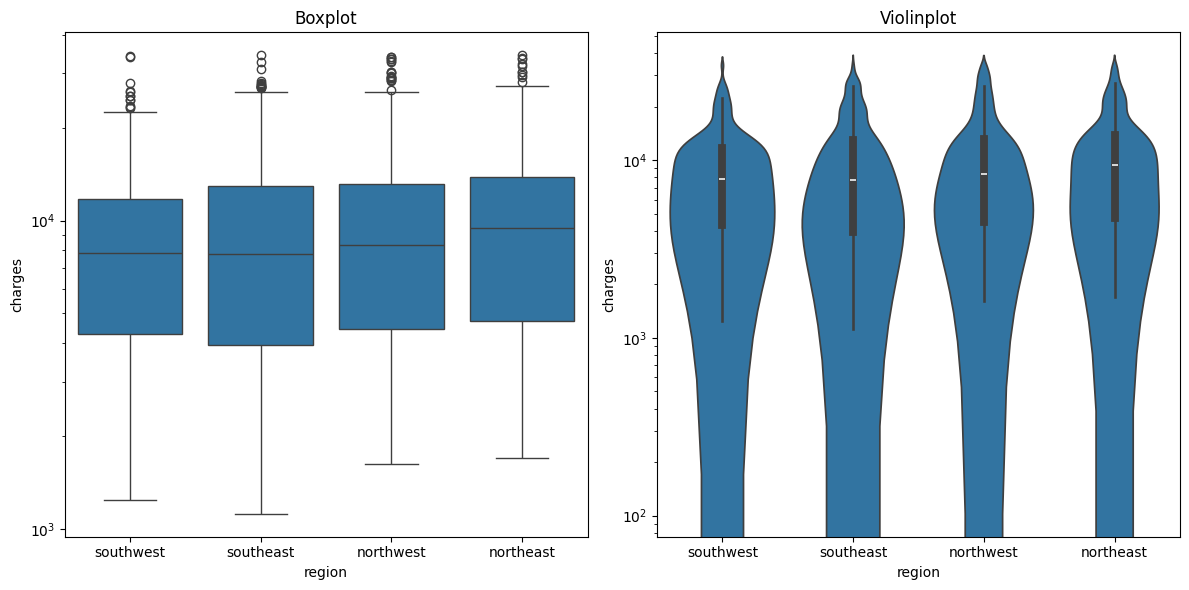

In [91]:
groups = [group['charges'].values for name, group in raw_df.groupby('region')]
stat, p = f_oneway(*groups)
print(f"ANOVA statistic = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Có sự khác biệt có ý nghĩa thống kê về chi phí giữa các vùng.")
else:
    print("→ KHÔNG có sự khác biệt có ý nghĩa thống kê.")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='region', y='charges', data=raw_df)
plt.yscale('log')
plt.title("Boxplot")
plt.subplot(1, 2, 2)
sns.violinplot(x='region', y='charges', data=raw_df)
plt.yscale('log')
plt.title("Violinplot")
plt.tight_layout()
plt.show()

> There is a statistically significant difference in medical charges across the four regions.
>
> Visualization insights:
>
> The boxplot and violin plot show that while the distributions of charges are generally similar across regions, there are some differences in medians and spread.
>
> The southeast and northwest regions appear to have slightly higher medians.
>
> The overall spread and presence of outliers are comparable among the regions.

* **Chi-squared**



> "Is there a relationship between gender (sex) and smoking behavior (smoker)?"

Chi-squared statistic = 0.1629, p-value = 0.6865
→ KHÔNG có mối liên hệ có ý nghĩa thống kê.


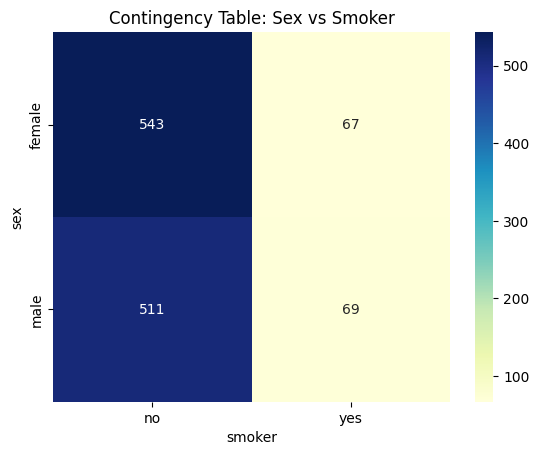

In [92]:
contingency = pd.crosstab(raw_df['sex'], raw_df['smoker'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-squared statistic = {chi2:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("→ Có mối liên hệ có ý nghĩa thống kê giữa giới tính và hành vi hút thuốc.")
else:
    print("→ KHÔNG có mối liên hệ có ý nghĩa thống kê.")

sns.heatmap(contingency, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Contingency Table: Sex vs Smoker")
plt.show()

> The heatmap and contingency table show that the proportions of smokers and non-smokers are relatively similar across males and females.
>
>Therefore, gender does not appear to influence smoking behavior in this dataset.

# **Correlation Analysis**

*   **Heatmap of Pearson Correlation**


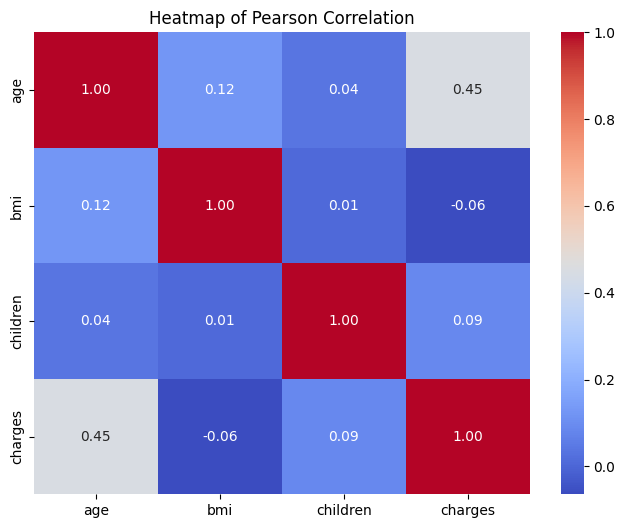

In [93]:
pearson_corr= raw_df.corr(method='pearson', numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Pearson Correlation")
plt.show()

*   **Heatmap of Spearman Correlation**


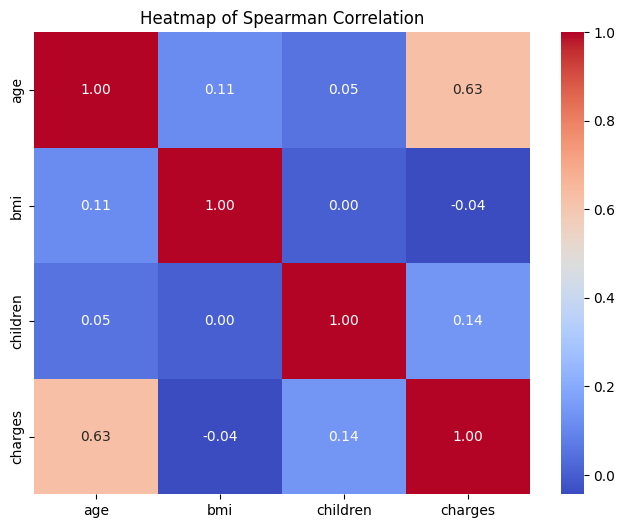

In [94]:
spearman_corr= raw_df.corr(method='spearman', numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Spearman Correlation")
plt.show()



*   **Relationship Between Age and Medical Charges by Smoking Status**



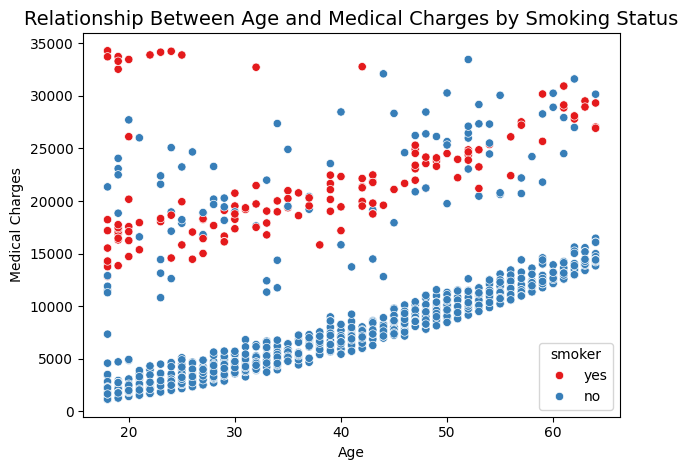

In [95]:
sns.scatterplot(data=raw_df, x='age', y='charges', hue='smoker', palette='Set1')

plt.title("Relationship Between Age and Medical Charges by Smoking Status", fontsize=14)

plt.xlabel("Age")
plt.ylabel("Medical Charges")

plt.tight_layout()
plt.show()



*   **Relationship Between BMI and Medical Charges by Smoking Status**



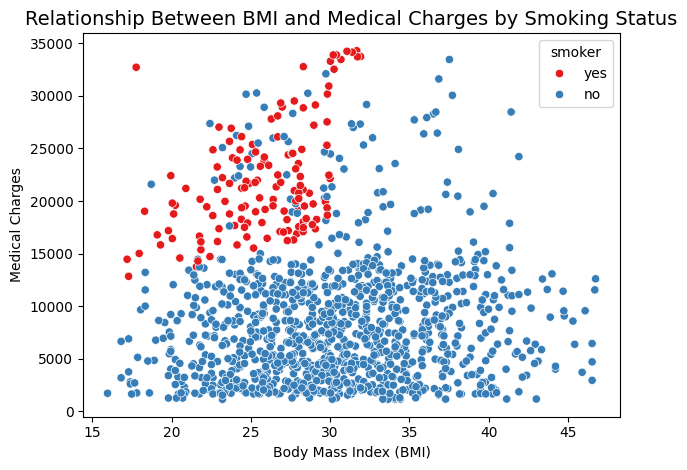

In [96]:
sns.scatterplot(data=raw_df, x='bmi', y='charges', hue='smoker', palette='Set1')

plt.title("Relationship Between BMI and Medical Charges by Smoking Status", fontsize=14)

plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Medical Charges")

plt.tight_layout()
plt.show()



*   **Pairplot of Insurance Features by Smoking Status**




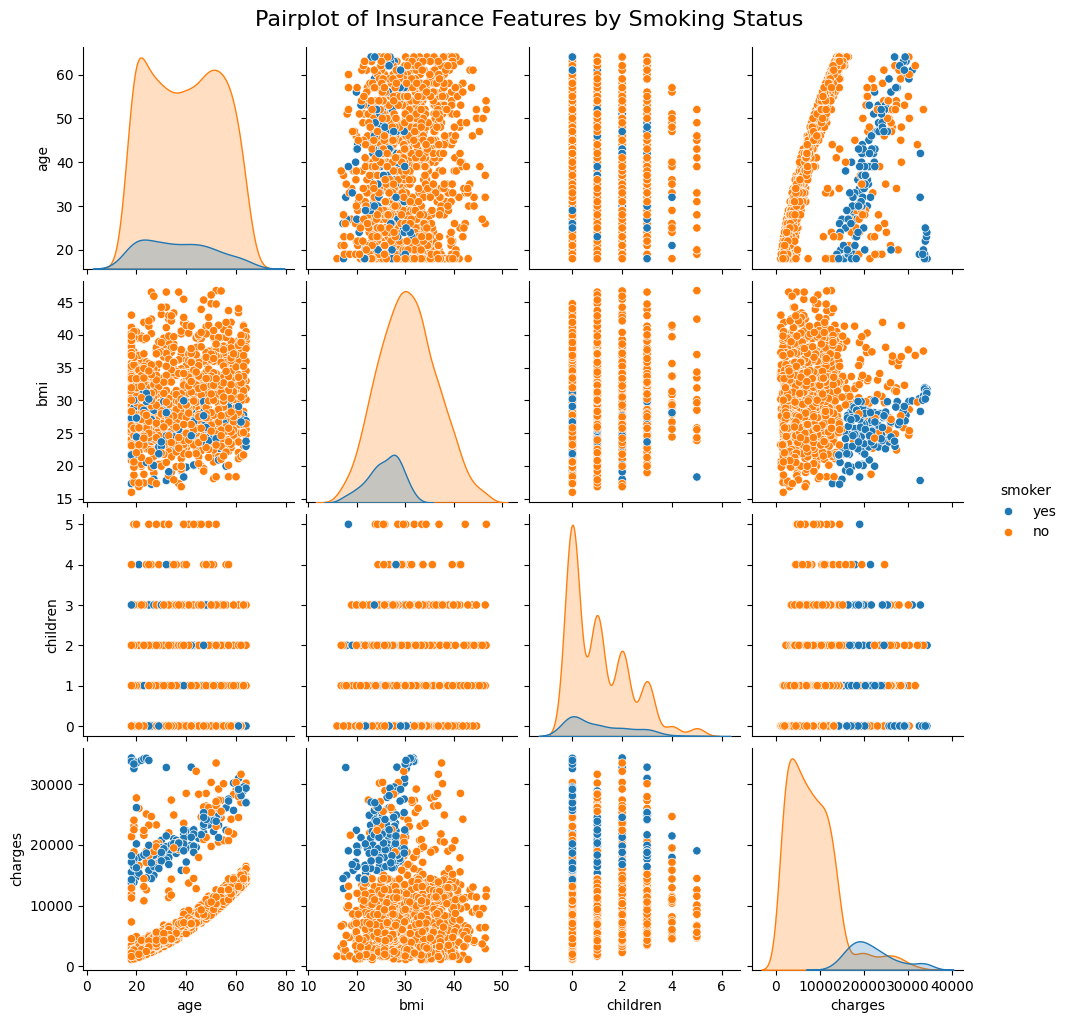

In [97]:
sns.pairplot(data=raw_df, hue='smoker')
plt.suptitle("Pairplot of Insurance Features by Smoking Status", y=1.02, fontsize=16)
plt.show()

## **Insights from Correlation Analysis**

* **Age and Charges (0.45):** A moderate positive correlation suggests that increasing age is associated with a tendency for higher charges.

* **BMI and Charges (-0.06):** Exhibiting a very weak negative correlation, Body Mass Index shows a negligible linear connection with the level of charges.

* **Children and Charges (0.09):** A weak positive correlation indicates a slight inclination for charges to be elevated among individuals with more offspring.

* **Age and BMI (0.12):** This weak positive correlation implies a minor trend for Body Mass Index to rise with advancing age.

* **Age and Children (0.04):** Displaying a very weak positive correlation, age demonstrates a negligible linear link with the count of children.

* **BMI and Children (0.01):** With a very weak positive correlation, Body Mass Index shows a negligible linear association with the number of children.